# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#building base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="

cityname = []
cloud = []
country = []
date = []
humid = []
lat = []
lng = []
max_temp = []
wind_speed = []

index = 1
set_index = 1

print("Begin Data Retrieval")
print(25*"-")
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cityname.append(response['name'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humid.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        if index > 50:
            index = 1
            set_index += 1
        else:
            index += 1
        
        print(f"Processing Record {index} of Set {set_index} | {city}")
    
    except (KeyError, IndexError):
        print("City not found... skipping.")

print(25*"-")        
print("Data Retrieval Complete")
print(25*"-")

Begin Data Retrieval
-------------------------
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | bathsheba
Processing Record 5 of Set 1 | rongcheng
City not found... skipping.
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | benghazi
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | jiexiu
Processing Record 11 of Set 1 | panjab
City not found... skipping.
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | komsomolskiy
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | guerrero negro
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | stanovoye
Processing Record 20 of Set 1 | turukhansk
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | san policarpo
Processing Record 2

Processing Record 34 of Set 4 | batagay
Processing Record 35 of Set 4 | pozo colorado
Processing Record 36 of Set 4 | oistins
Processing Record 37 of Set 4 | ahipara
Processing Record 38 of Set 4 | evensk
Processing Record 39 of Set 4 | anori
City not found... skipping.
Processing Record 40 of Set 4 | necochea
City not found... skipping.
Processing Record 41 of Set 4 | nanortalik
Processing Record 42 of Set 4 | los llanos de aridane
Processing Record 43 of Set 4 | alice town
Processing Record 44 of Set 4 | bakchar
Processing Record 45 of Set 4 | pangnirtung
Processing Record 46 of Set 4 | nouadhibou
Processing Record 47 of Set 4 | shimoda
Processing Record 48 of Set 4 | koplik
Processing Record 49 of Set 4 | kahului
Processing Record 50 of Set 4 | encruzilhada
City not found... skipping.
Processing Record 51 of Set 4 | chokurdakh
City not found... skipping.
City not found... skipping.
Processing Record 1 of Set 5 | kodiak
Processing Record 2 of Set 5 | poum
Processing Record 3 of Set 5

Processing Record 16 of Set 8 | nanga eboko
City not found... skipping.
Processing Record 17 of Set 8 | quelimane
Processing Record 18 of Set 8 | tabas
Processing Record 19 of Set 8 | chaohu
Processing Record 20 of Set 8 | el molino
Processing Record 21 of Set 8 | pemba
City not found... skipping.
Processing Record 22 of Set 8 | deputatskiy
Processing Record 23 of Set 8 | bandarbeyla
Processing Record 24 of Set 8 | esil
Processing Record 25 of Set 8 | brynmawr
Processing Record 26 of Set 8 | senneterre
Processing Record 27 of Set 8 | livingston
Processing Record 28 of Set 8 | oranjemund
City not found... skipping.
Processing Record 29 of Set 8 | biak
Processing Record 30 of Set 8 | churapcha
Processing Record 31 of Set 8 | ust-koksa
Processing Record 32 of Set 8 | muroto
Processing Record 33 of Set 8 | huanuco
Processing Record 34 of Set 8 | kajaani
City not found... skipping.
Processing Record 35 of Set 8 | ampanihy
City not found... skipping.
Processing Record 36 of Set 8 | southbrid

In [8]:
weather_df = pd.DataFrame({"City":cityname,"Cloudiness":cloud,"Country":country,
                           "Date": date, "Humidity": humid,"Lat":lat,
                           "Lng": lng,"Max Temp": max_temp, "Wind Speed": wind_speed})
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,100,PF,1570761703,71,-23.12,-134.97,68.54,8.10
1,Kaitangata,100,NZ,1570761703,84,-46.28,169.85,45.00,24.00
2,Bathsheba,40,BB,1570761704,74,13.22,-59.52,82.40,10.29
3,Rongcheng,58,CN,1570761704,16,37.16,122.42,64.00,1.99
4,Tiksi,100,RU,1570761704,90,71.64,128.87,18.41,3.69
5,Ushuaia,90,AR,1570762170,79,-54.81,-68.31,26.60,32.21
6,Benghazi,0,LY,1570762170,57,32.12,20.07,76.05,10.50
7,Georgetown,75,GY,1570761705,94,6.80,-58.16,77.00,4.70
8,Jiexiu,58,CN,1570761705,45,37.02,111.92,64.00,3.19
9,Panjab,0,AF,1570761705,69,34.38,67.02,33.39,6.86


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#export to csv
weather_df.to_csv("weather_data.csv",index=False)
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,100,PF,1570761703,71,-23.12,-134.97,68.54,8.10
1,Kaitangata,100,NZ,1570761703,84,-46.28,169.85,45.00,24.00
2,Bathsheba,40,BB,1570761704,74,13.22,-59.52,82.40,10.29
3,Rongcheng,58,CN,1570761704,16,37.16,122.42,64.00,1.99
4,Tiksi,100,RU,1570761704,90,71.64,128.87,18.41,3.69
5,Ushuaia,90,AR,1570762170,79,-54.81,-68.31,26.60,32.21
6,Benghazi,0,LY,1570762170,57,32.12,20.07,76.05,10.50
7,Georgetown,75,GY,1570761705,94,6.80,-58.16,77.00,4.70
8,Jiexiu,58,CN,1570761705,45,37.02,111.92,64.00,3.19
9,Panjab,0,AF,1570761705,69,34.38,67.02,33.39,6.86


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

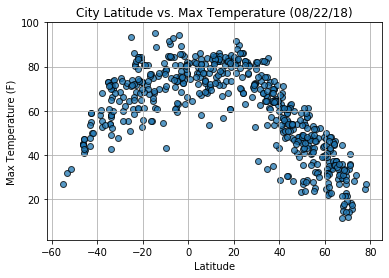

In [10]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker="o", edgecolors="black", alpha=0.75)

plt.xlim(-62, 85)
plt.ylim(min(weather_df['Max Temp'])-10, max(weather_df['Max Temp'])+5)
plt.grid()

plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


plt.savefig("lat_maxtemp.png")
plt.show()

#### Latitude vs. Humidity Plot

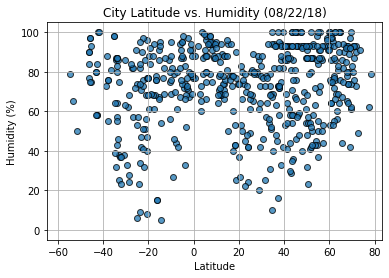

In [11]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker="o", edgecolors="black", alpha=0.75)

plt.xlim(min(weather_df['Lat'])-10, max(weather_df['Lat'])+5)
plt.ylim(min(weather_df['Humidity'])-10, max(weather_df['Humidity'])+5)
plt.grid()

plt.title("City Latitude vs. Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


plt.savefig("latv_humid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

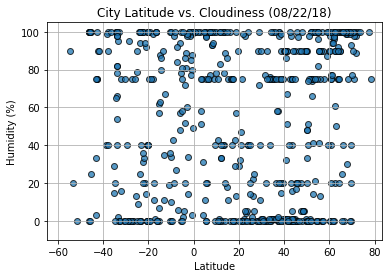

In [12]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker="o", edgecolors="black", alpha=0.75)

plt.xlim(min(weather_df['Lat'])-10, max(weather_df['Lat'])+5)
plt.ylim(min(weather_df['Cloudiness'])-10, max(weather_df['Cloudiness'])+5)
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("latv_cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

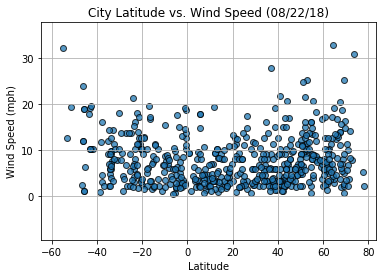

In [13]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker="o", edgecolors="black", alpha=0.75)

plt.xlim(min(weather_df['Lat'])-10, max(weather_df['Lat'])+5)
plt.ylim(min(weather_df['Wind Speed'])-10, max(weather_df['Wind Speed'])+5)
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("latv_wind.png")
plt.show()